In [33]:
!pip install split-folders

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [78]:
!pip install wget

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9681 sha256=d83321aac36da32dff1d9116d6067f5dec0c4dc37a5235c92f329cc1b608c8bc
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [36]:
import splitfolders

In [1]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

In [2]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
# Freeze base model
base_model.trainable = False

In [4]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer
outputs = keras.layers.Dense(3, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs, outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1539      
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically

In [22]:
!git clone https://github.com/MJVNOR/R3CO

fatal: destination path 'R3CO' already exists and is not an empty directory.


In [38]:
splitfolders.ratio('data/recycle', output="output", seed=1337, ratio=(.8, 0.2)) 

Copying files: 276 files [00:00, 3873.67 files/s]


In [66]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('R3CO/output/train/', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode="categorical")
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('R3CO/output/val/', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 220 images belonging to 3 classes.
Found 56 images belonging to 3 classes.


In [67]:
model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples/train_it.batch_size,
          validation_steps=valid_it.samples/valid_it.batch_size,
          epochs=20, callbacks=[callback])

Epoch 1/20
6/6 [==============================] - 92s 14s/step - loss: 1.7214 - accuracy: 0.4079 - val_loss: 0.7203 - val_accuracy: 0.6607
Epoch 2/20
6/6 [==============================] - 90s 13s/step - loss: 0.6324 - accuracy: 0.7543 - val_loss: 0.3611 - val_accuracy: 0.8393
Epoch 3/20
6/6 [==============================] - 90s 14s/step - loss: 0.3014 - accuracy: 0.9104 - val_loss: 0.2149 - val_accuracy: 0.9464
Epoch 4/20
6/6 [==============================] - 90s 14s/step - loss: 0.2252 - accuracy: 0.9128 - val_loss: 0.1821 - val_accuracy: 0.9286
Epoch 5/20
6/6 [==============================] - 90s 14s/step - loss: 0.1324 - accuracy: 0.9711 - val_loss: 0.1228 - val_accuracy: 0.9464
Epoch 6/20
6/6 [==============================] - 91s 14s/step - loss: 0.1340 - accuracy: 0.9737 - val_loss: 0.1050 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 90s 14s/step - loss: 0.0724 - accuracy: 0.9974 - val_loss: 0.0767 - val_accuracy: 0.9821
Epoch 8/20
6/6 [===========

In [75]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

In [109]:
def argmax(lst):
  return lst.index(max(lst))

In [156]:
def typeOf(image_path):
    preds = make_predictions(image_path).tolist()[0]
    theMax = preds.index(max(preds))
    if theMax == 1:
        print("Cardboard")
    elif theMax == 2:
        print("Plastic")
    else:
        print("Aluminium")
    
    #print(theMax)

Cardboard


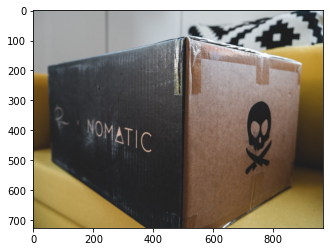

In [157]:
typeOf("photo-1585501954837-9d99d09aa2c1")

Plastic


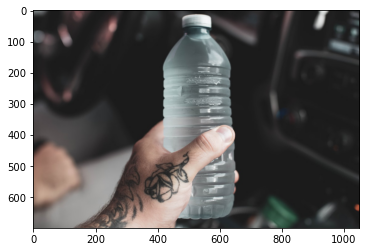

In [158]:
typeOf("photo-1601507793214-77d2a926582a")

Aluminium


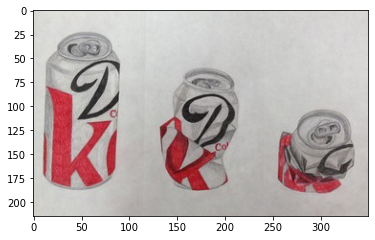

In [159]:
typeOf("original-1595682-4.jpg")

In [154]:
import wget

# Set up the image URL
image_url = "https://ecdn.teacherspayteachers.com/thumbitem/Pop-Can-Crush-Observational-DrawingStill-Life-Unit-Bundle-1595682-1542993096/original-1595682-4.jpg"

# Use wget download method to download specified image url.
image_filename = wget.download(image_url)

print('Image Successfully Downloaded: ', image_filename)

Image Successfully Downloaded:  original-1595682-4.jpg


In [161]:
model.save(
    "",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

INFO:tensorflow:Assets written to: assets
